# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

## 0.imports

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections
print(os.getpid())

44372


### 0.1 old info imports, just for checking purposes

In [2]:
# master folder for this dataset:
master_folder = r'Z:/20180911-IMR90_whole-chr21'
# get Folders, Field-of-views
folders, fovs = ia.get_img_info.get_folders(master_folder, feature='H', verbose=True)
# analysis
analysis_folder=master_folder+os.sep+'Analysis'

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65


## 1. Create Cell_Data item

In [3]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes.py'>

### 1.0 create cell_data class and load basic info

In [4]:
fov_id = 55;
cell_id = 22
# specify initialization parameters:
param = {'data_folder':'Z:/20180911-IMR90_whole-chr21',
         'fov_id': fov_id,
         'cell_id': 22,
         'temp_folder': r'I:\Pu_temp',
         'save_folder':r'Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu',
         'map_folder':r'Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\distmap',
         'num_threads':15,
         };
# initialize cell_data class:
a = ia.classes.Cell_Data(param)

# load color_usage
a._load_color_info();
# load encoding_scheme
a._load_encoding_scheme();

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 127 folders are found according to color-usage annotation.
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Encoding_Scheme.csv
-- hyb per group: 5
-- region per group: 10
-- colors: ['750', '647', '561']
-- number of groups: [22, 22, 22]


### 1.1 Load more info for cell

In [5]:
# load existing cell_info, dont run for the first time
a._load_from_file('cell_info')
# load segmentation
a._load_segmentation(_denoise_window=0);
# load drift info
drift = a._load_drift(_size=650, _dynamic=True)


- drift already exists for cell:22, skip


### 1.2 Load and crop images from raw data

#### 1.2.1 combo

In [14]:
if not a._check_full_set('combo'):
    _temp_filenames, _ref_names, _ref_channels = a._generate_corrected_images('combo', _load_in_ram=False,
                                                                               _return_refs=True, _overwrite=False,
                                                                               _verbose=True)
    combo_groups = a._crop_images('combo', _load_in_ram=False, _temp_filenames=_temp_filenames,
                                 _save=True, _overwrite=False, _verbose=True)

#### 1.2.2 unique

In [28]:
if not a._check_full_set('unique'):
    _temp_filenames, _ref_names, _ref_channels = a._generate_corrected_images('unique', _load_in_ram=False,
                                                                               _return_refs=True, _overwrite=False,
                                                                               _verbose=True)
    combo_groups = a._crop_images('unique', _load_in_ram=False, _temp_filenames=_temp_filenames,
                                 _save=True, _overwrite=False, _verbose=True)

- Generate corrected images for fov:55, cell:22
-- 48 is going to be corrected
-- start correcting unique for fov:55, cell:22 with 12 threads
-- time spent in this correction:1.6021959781646729
- Crop images from temp_files
Start cropping unique image, num_of_images:48
-- start cropping unique for fov:55, cell:22 with 12 threads
-- time spent in cropping:9.417059659957886
-- saving unique to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\unique_rounds.npz


### 1.3 Save to file 

In [974]:
#a._save_to_file('all') # save all

a._save_to_file('cell_info') # save all cell_info exclude images
#a._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#a._save_to_file('unique') # save unique info into unique_rounds.npz

#a._save_to_file('combo') # save combo_groups into Harry's format

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['distance_reference']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl


### 1.4 Directly load from files

In [26]:
# unique
#a._load_from_file('unique', _overwrite=False)
# combo
a._load_from_file('combo', _overwrite=False)
# similar examples for combo and all

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-2\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-2\channel-647\rounds.npz
-- loading combo

## 2. Generate and Pick chromosome

### 2.1 generate and identify chromosome

C:\Users\puzheng\AppData\Local\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:361: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


<IPython.core.display.Javascript object>


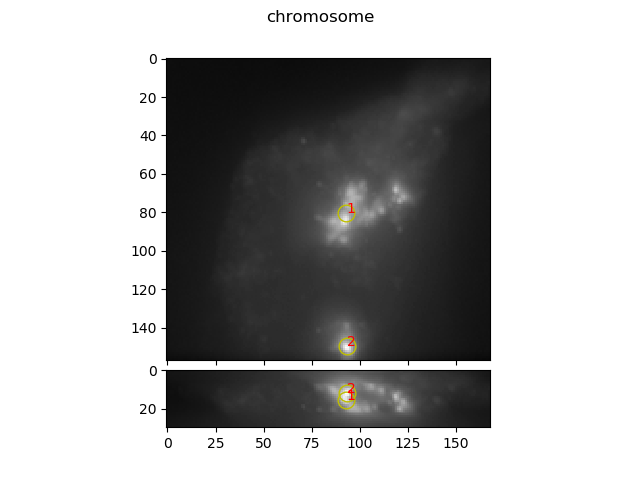

In [16]:
# generate
a._generate_chromosome_image('combo')
# identify
a._identify_chromosomes();
# manually pick for only this cell
a._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

### 2.2 Update chromosome coordinate info

In [27]:
a._update_chromosome_from_file(_force=True);

-- 2 loaded
- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'chrom_coord', 'chrom_coords', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'num_threads', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\gro

-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-18\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-19\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-19\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: 

In [9]:
a.combo_groups[0].matrix.shape[1]

10

## 3. Fitting and picking spots for decoded images

### 3.1 Load decoded images

In [37]:
a._load_from_file('decoded', _decoded_flag='diff')
print(len(a.decoded_ids))

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-0\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-0\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-0\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-2\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-8\cell-3\group-2\channel-647\rounds.npz
-- loading combo from file: Z:\2

### 3.2 multi-fitting

In [6]:
cand_spots = a._multi_fitting(_type='decoded', _decoded_flag='diff', _num_threads=18, _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)
#cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

+ Start multi-fitting for decoded images
++ no decoded image info loaded to this cell, try loading:
No combo groups loaded in fov:55, cell:22, start loading combo!
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-21\channel-750\rounds.npz
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-561\diff\regions.npz
--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-1\channel-561\diff\reg

--- decoded result matched for group:10, color:750
--- kept ids: [112, 170, 221, 264, 342, 430, 462, 558, 583, 642]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-11\channel-561\diff\regions.npz
--- decoded result matched for group:11, color:561
--- kept ids: [117, 172, 226, 332, 354, 397, 481, 534, 585, 602]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-11\channel-647\diff\regions.npz
--- decoded result matched for group:11, color:647
--- kept ids: [75, 116, 174, 265, 343, 356, 434, 533, 547, 587]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-11\channel-750\diff\regions.npz
--- decoded result matched for group:11, color:750
--- kept ids: [115, 173, 224, 267, 345, 433, 465, 586, 624, 645]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\group-12\channel-56

++ start fitting decoded for fov:55, cell:22 with 18 threads
++ total time in fitting decoded: 1531.4450142383575
- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['decoded_ids', 'decoded_spots']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl


### 3.3 picking spots by intensity

In [73]:
naive_decoded_pts = a._naive_picking_spots('decoded', _save=False)

+ Pick decoded spots for by brightness in fov:55, cell:22


#### 3.2.1 distance map for one chromosome

In [74]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_decoded_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:0, coordinate:[15.1344929  80.24546791 93.03503185]


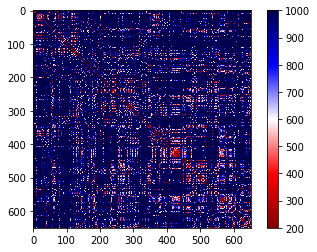

In [75]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 3.4 dynamic picking spots

In [84]:
dynamic_decoded_pts = a._dynamic_picking_spots('decoded', _w_dist=2, _save=True)

+ Pick decoded spots for by brightness in fov:55, cell:22
- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_decoded_spots']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl


++ generate decoded dist-map for fov:55, cell:22, chrom:0


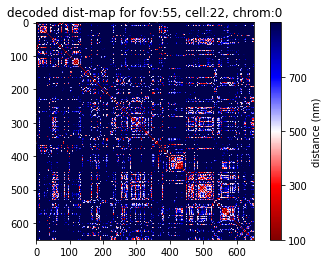

++ generate decoded dist-map for fov:55, cell:22, chrom:1


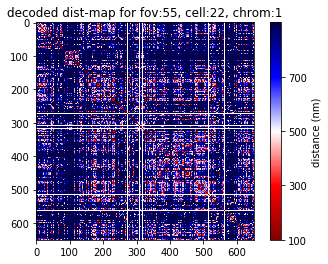

- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['decoded_distance_map']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl


In [85]:
distmaps = a._generate_distance_map('decoded',_limits=[100,900])

## 4. Fitting and picking spots for unique images

### 4.1 Load decoded images

included in previous loading process

### 4.2 multi-fitting

In [29]:
cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-7)

+ Start multi-fitting for unique images
++ no unique image info loaded to this cell, try loading:
- Loading unique from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\unique_rounds.npz
loading image with unique_id: 278
loading image with unique_id: 279
loading image with unique_id: 280
loading image with unique_id: 281
loading image with unique_id: 282
loading image with unique_id: 283
loading image with unique_id: 284
loading image with unique_id: 285
loading image with unique_id: 286
loading image with unique_id: 287
loading image with unique_id: 288
loading image with unique_id: 289
loading image with unique_id: 290
loading image with unique_id: 291
loading image with unique_id: 292
loading image with unique_id: 293
loading image with unique_id: 294
loading image with unique_id: 295
loading image with unique_id: 296
loading image with unique_id: 297
loading image with unique_id: 298
loading image with unique_id: 299
loading image with unique_id: 300
loading im

### 4.3 picking spots by intensity

In [76]:
naive_unique_pts = a._naive_picking_spots('unique', _save=False)

+ Pick unique spots for by brightness in fov:55, cell:22


#### 4.2.1 distance map for one chromosome

In [77]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_unique_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:0, coordinate:[15.1344929  80.24546791 93.03503185]


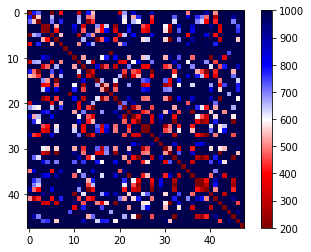

In [78]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 4.4 dynamic picking spots

In [87]:
dynamic_unique_pts = a._dynamic_picking_spots('unique', _w_dist=2)

+ Pick unique spots for by brightness in fov:55, cell:22
- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl


++ generate unique dist-map for fov:55, cell:22, chrom:0


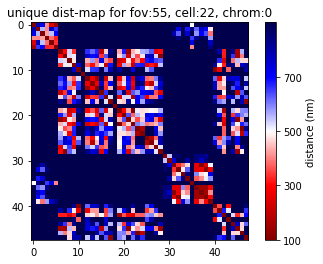

++ generate unique dist-map for fov:55, cell:22, chrom:1


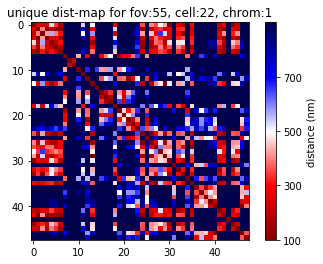

- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-55\cell-22\cell_info.pkl


In [88]:
distmaps = a._generate_distance_map('unique',_limits=[100,900])

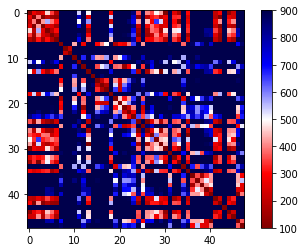

In [69]:
plt.figure()
plt.imshow(a.unique_distance_map[1], interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=100, vmax=900)
plt.colorbar()

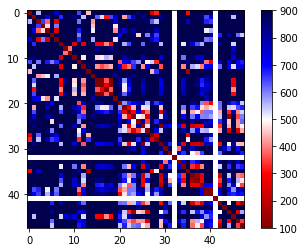

In [72]:
cropped_decoded_map = a.decoded_distance_map[1][277:325,277:325]
plt.figure()
plt.imshow(cropped_decoded_map, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=100, vmax=900)
plt.colorbar()

In [89]:
naive_dist = (np.array(naive_unique_pts[0]) - np.array(naive_decoded_pts[0][277:325]))[:,1:4]

In [90]:
dynamic_dist = (np.array(dynamic_unique_pts[0]) - np.array(dynamic_decoded_pts[0][277:325]))[:,1:4]

In [114]:
np.sqrt( ((naive_dist * a.distance_zxy)**2).sum())/len(naive_dist)

200.64799422807096

In [113]:
np.sqrt( ((dynamic_dist * a.distance_zxy)**2).sum())/len(dynamic_dist)

194.55357844989302

<IPython.core.display.Javascript object>


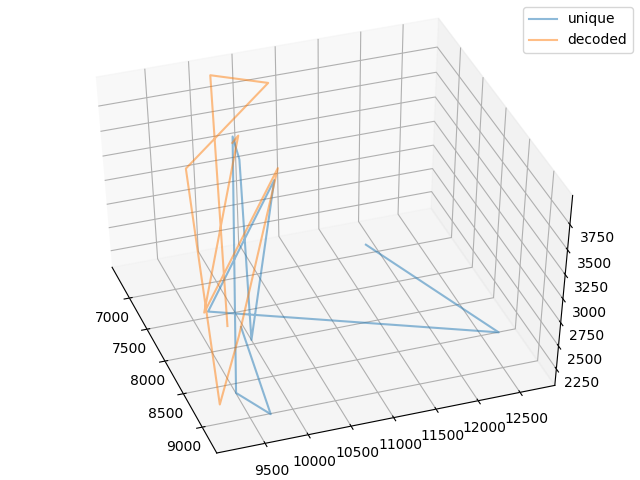

In [119]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
du_pts = np.array(naive_unique_pts[0])[:,1:4]*a.distance_zxy
dd_pts = np.array(naive_decoded_pts[0])[:,1:4][277:325]*a.distance_zxy

du_pts = du_pts[:10]
dd_pts = dd_pts[:10]

ax.plot(du_pts[:,1], du_pts[:,2],du_pts[:,0], label='unique', alpha=0.5)
ax.plot(dd_pts[:,1], dd_pts[:,2],dd_pts[:,0], label='decoded', alpha=0.5)
plt.legend()

<IPython.core.display.Javascript object>


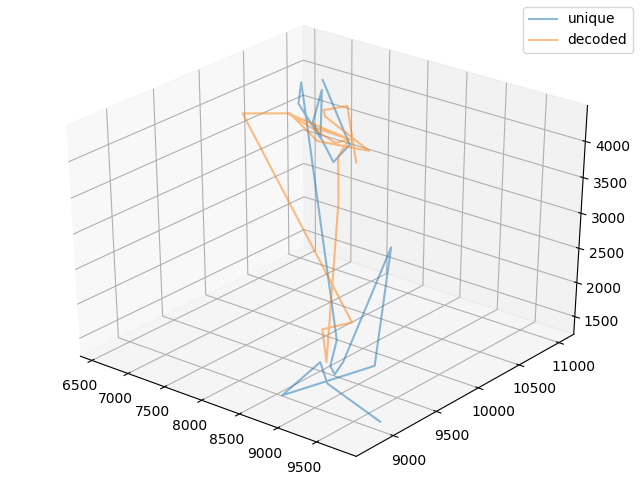

In [127]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
du_pts = np.array(dynamic_unique_pts[0])[:,1:4]*a.distance_zxy
dd_pts = np.array(dynamic_decoded_pts[0])[:,1:4][277:325]*a.distance_zxy

du_pts = du_pts[30:]
dd_pts = dd_pts[30:]

ax.plot(du_pts[:,1], du_pts[:,2],du_pts[:,0], label='unique', alpha=0.5)
ax.plot(dd_pts[:,1], dd_pts[:,2],dd_pts[:,0], label='decoded', alpha=0.5)
plt.legend()

In [102]:
%matplotlib notebook